#Comencemos por importar las librerías que utilizaremos:

In [65]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Se lee el archivo csv y se lo carga como un dataset de Pandas.

In [66]:
# Vinculamos Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
path = "/content/drive/MyDrive/Práctica/Granos/cabecera_limpia_svaried.csv"
dataset = pd.read_csv(path) 

#veamos cuantas dimensiones y registros contiene
dataset.shape

(313, 5)

Veamos esas primeras filas:

In [68]:
#son 313 registros con 6 columnas. Veamos los primeros registros
dataset.head()

,Humedad Ingreso,Humedad Salida,Enteros Entrada Con Reposo,Enteros salida con Reposo,Quebrado
0,16.10,12.82,62.49,62.39,0.10
1,28.06,16.40,62.41,61.76,0.65
2,26.95,16.94,64.88,64.20,0.68
3,17.42,13.24,63.72,61.93,1.79
4,27.84,16.39,64.79,61.53,3.26


Veamos algunas estadísticas básicas de nuestros datos de entrada:

In [69]:
dataset.describe()

,Humedad Ingreso,Humedad Salida,Enteros Entrada Con Reposo,Enteros salida con Reposo,Quebrado
count,313.000000,313.000000,313.000000,313.000000,313.000000
mean,21.136358,14.281214,63.442332,61.855559,1.764026
std,4.120145,1.749919,1.875291,2.070711,1.708157
min,14.460000,12.030000,56.100000,53.700000,0.000000
25%,17.400000,12.910000,62.580000,60.960000,0.480000
50%,21.230000,13.270000,63.720000,62.150000,1.410000
75%,24.660000,15.530000,64.730000,63.190000,2.580000
max,29.520000,18.370000,67.320000,66.660000,8.940000


Aqui se observa que la media de Humedad Ingreso en los granos es de 21.14. La más baja es 14.46 y la más alta es 29.52. Se intentará ver con una relación lineal, si hay una correlación entre Humedad Ingreso y Humedad Salida.

Se realiza una visualización en general de los datos de entrada:

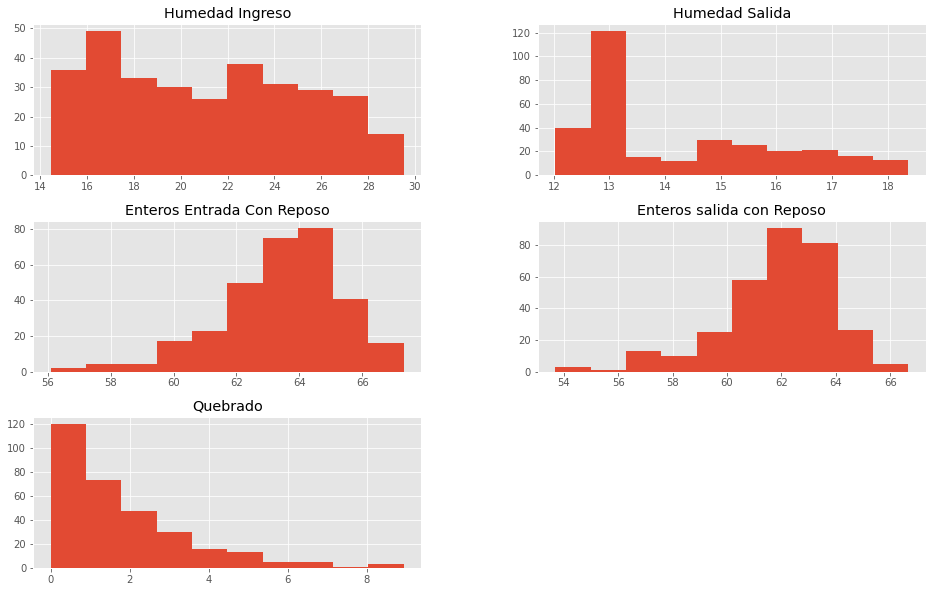

In [70]:
# Visualizamos rápidamente las caraterísticas de entrada
dataset.hist()
plt.show()

Si ahora se realiza un diagrama de dispersión solamente con las dos variables que se utilizaran para el modelo, queda:

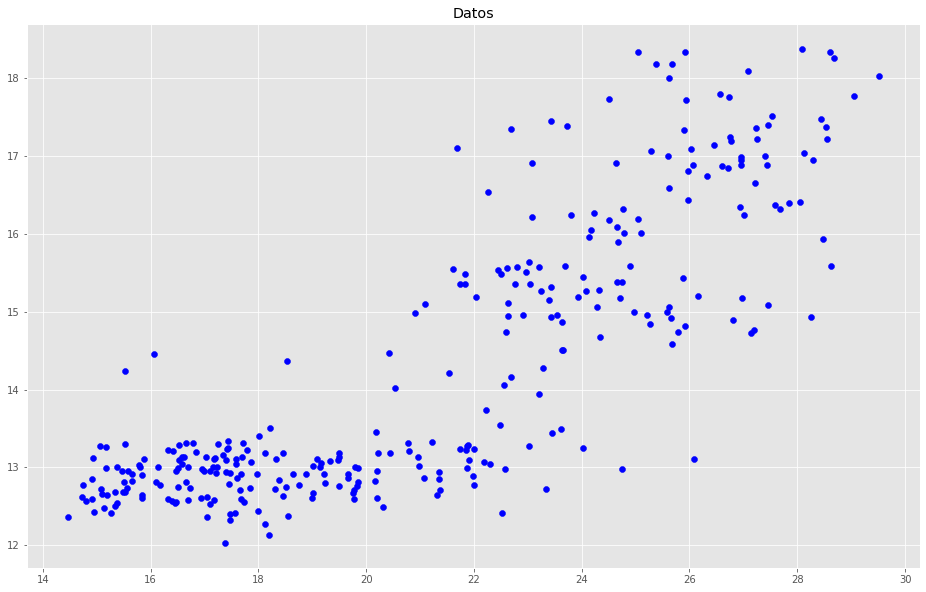

In [71]:
x = dataset['Humedad Ingreso'] # generamos valores x de 0 a 20 en intervalos de 0.5

y = dataset['Humedad Salida'] # calculamos y a partir de la función que hemos generado
# hacemos un gráfico de los datos que hemos generado
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');

Del gráfico anterior se puede observar que para valores de Humedad Ingreso menores a 19 el resultado de Humedad Salida para estar acotado a un rango de valores chico (resultado esperado del proceso analizado), pero para valores superiores ya se ve una mayor dispersión y es por eso que el estudio se centrará en dichos valores.
Lo siguiente que se hace es recortar los valores a Humedad Ingreso mayor a 19 y Humedad Salida mayores a 12.5, y a continuación se graficanen un diagrama de dispersión.

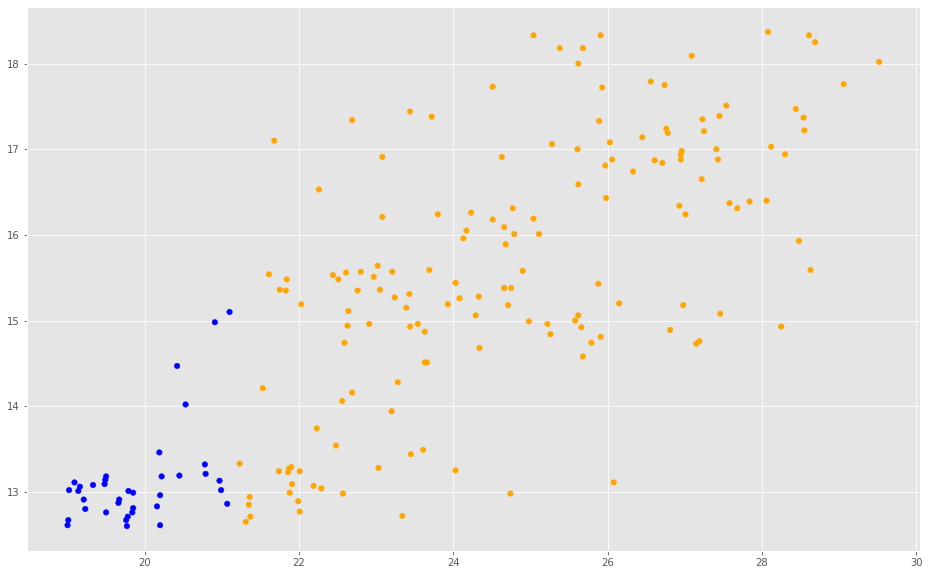

In [72]:
filtered_dataset = dataset[(dataset['Humedad Ingreso'] >= 19) & (dataset['Humedad Salida'] >= 12.5)]

colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_dataset['Humedad Ingreso'].values
f2 = filtered_dataset['Humedad Salida'].values
 

# Se pinta en colores los puntos por debajo y por encima de la media de Humedad Ingreso
asignar=[]
for index, row in filtered_dataset.iterrows():
    if(row['Humedad Ingreso']>21.14):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

#**Regresión Lineal con Python y SKLearn**

Se van a crear los datos de entrada por el momento sólo Humedad Ingreso y como etiquetas Humedad Salida. Se crea el objeto LinearRegression y se lo hace “encajar” (entrenar) con el método fit(). Finalmente se imprimen los coeficientes y puntajes obtenidos.

In [73]:

# Se asigna la variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_dataset[["Humedad Ingreso"]]
X_train = np.array(dataX)
y_train = filtered_dataset['Humedad Salida'].values

# Se crea el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Se entrena el modelo
regr.fit(X_train, y_train)

# Se hacen las predicciones que en definitiva es una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Se ven los coeficienetes obtenidos, en este caso, será la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.48556429]
Independent term: 
 3.5726247655989827
Mean squared error: 1.15
Variance score: 0.60


Se puede observar que si bien el error cuadrático medio es bajo lo cual es indicativo que los datos se ajustan bien a la predicción del modelo. La varianza posee un valor bueno teniendo en cuenta que el ideal es 1. 

#**Se Visualiza la Recta**
Se observa la recta obtenida:

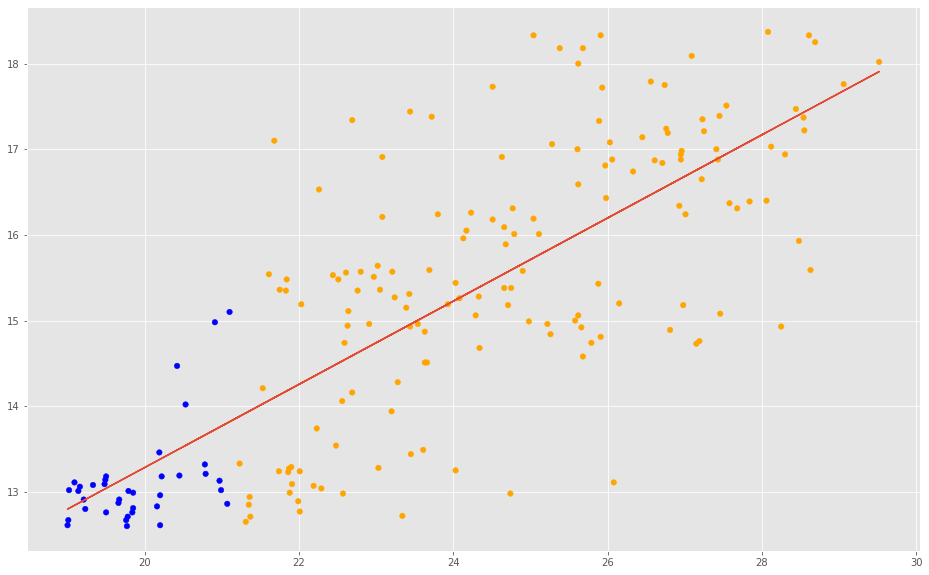

In [74]:
plt.scatter(f1, f2, c=asignar, s=tamanios[0])

plt.plot(dataX,y_pred)
plt.show()

#**Predicción en regresión lineal simple**
Se probará el algoritmo, suponiendo que se quisiera predecir cuánta Humedad Salida se obtendrá para Humedad Ingreso de 24.

In [75]:
# Quiero predecir cuánta "Humedad Salida" se va a obtener pora una Humedad Ingreso de 24,
# según el modelo, se hace:
y_veinticuatro = regr.predict([[24]])
print(y_veinticuatro)

[15.2261677]


#**Regresión Lineal Múltiple**
(o “Regresión con Múltiples Variables”)

En este caso se extiende el ejercicio utilizando más de una variable de entrada para el modelo. Esto le da mayor poder al algoritmo de Machine Learning, pues de esta manera se podran obtener predicciones más complejas.

**Para este caso, se utilizan 2 “variables predictivas” para poder graficar en 3D**, para mejores predicciones se pueden utilizar más de 2 entradas y prescindir del grafico.

Para seleccionar las varibles a incluir se va a realizar un análsis de componentes principales PCA para decidir que variables son las más representativas de mis datos.

     Humedad Ingreso  Humedad Salida  ...  Enteros salida con Reposo  Quebrado
303            15.66           12.83  ...                      64.41      0.79
304            25.62           16.59  ...                      63.81      1.34
305            16.58           13.04  ...                      64.10      0.00
306            26.45           17.14  ...                      63.77      0.18
307            17.16           13.01  ...                      64.15      0.61
308            24.66           16.09  ...                      62.04      1.97
309            16.13           13.00  ...                      63.88      0.17
310            20.53           14.02  ...                      59.82      5.48
311            15.81           13.01  ...                      62.71      0.80
312            17.68           12.60  ...                      63.37      2.39

[10 rows x 5 columns]
shape of X_pca (313, 4)
[0.41620662 0.39138896 0.18681263 0.00559179]
suma: 0.80759557833572


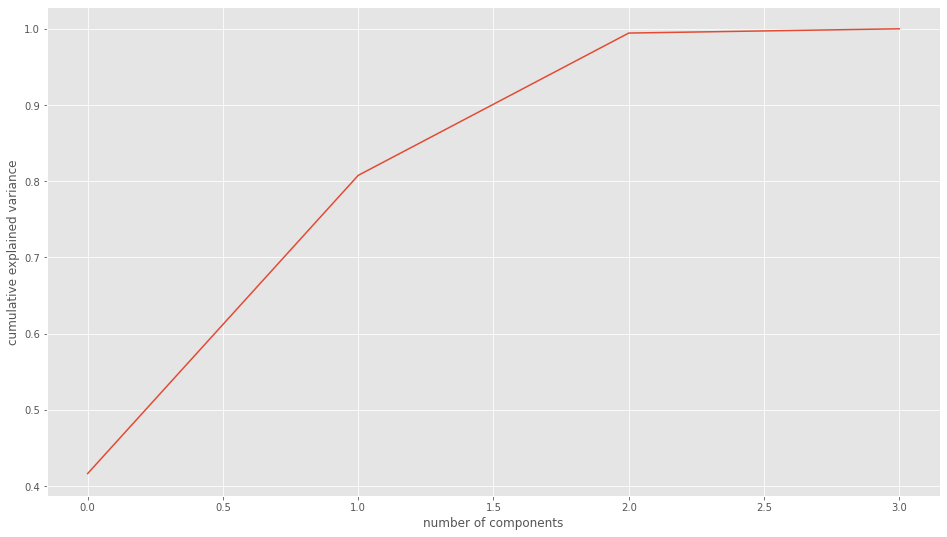

In [76]:
# Análisis de componentes principales PCA

#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#cargamos los datos de entrada
#dataframe = pd.read_csv(r"comprar_alquilar.csv")
print(dataset.tail(10))

#normalizamos los datos
scaler=StandardScaler()
df = dataset.drop(['Humedad Salida'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo

#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=4) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))
#Vemos que con 2 componentes tenemos el 80% de varianza explicada

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


Del calculo anterior se observa que con las primeras dos variables ya se tiene algo más del 80% de la variación aculmulada explicada, razón por la cual se utilizan en el modelo.

In [77]:
#Se tratará de mejorar el Modelo, con una dimensión más: 
 
dataX2 =  pd.DataFrame()
dataX2["Humedad Ingreso"] = filtered_dataset["Humedad Ingreso"]
dataX2["Enteros Entrada Con Reposo"] = filtered_dataset["Enteros Entrada Con Reposo"]
XY_train = np.array(dataX2)
z_train = filtered_dataset['Humedad Salida'].values

Ya tenemos nuestras 2 variables de entrada en XY_train y nuestra variable de salida pasa de ser “Y” a ser el eje “Z”.

Se crea un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las dos dimensiones que queremos entrenar: las que contiene XY_train. Al igual que antes, se imprimen los coeficientes y puntajes obtenidos:

In [78]:
# Se crea un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Se entrena el modelo, esta vez, con 2 dimensiones
# Se obtienen 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Se realzia la predicción con la que se tienen puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [0.47375797 0.07769034]
Mean squared error: 1.13
Variance score: 0.61


En este caso el resultado es casi el mismo que para el caso lineal simple, baja un poquito el error y sube un poquito la varianza. En general se toman las mismas conclusiones.

#**Visualizar un plano en 3 Dimensiones en Python**
Se grafican los puntos de las características de entrada en color azul y los puntos proyectados en el plano en rojo. Recordar que en esta gráfica, el eje Z corresponde a la “altura” y representa la cantidad de Shares que obtendremos.

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

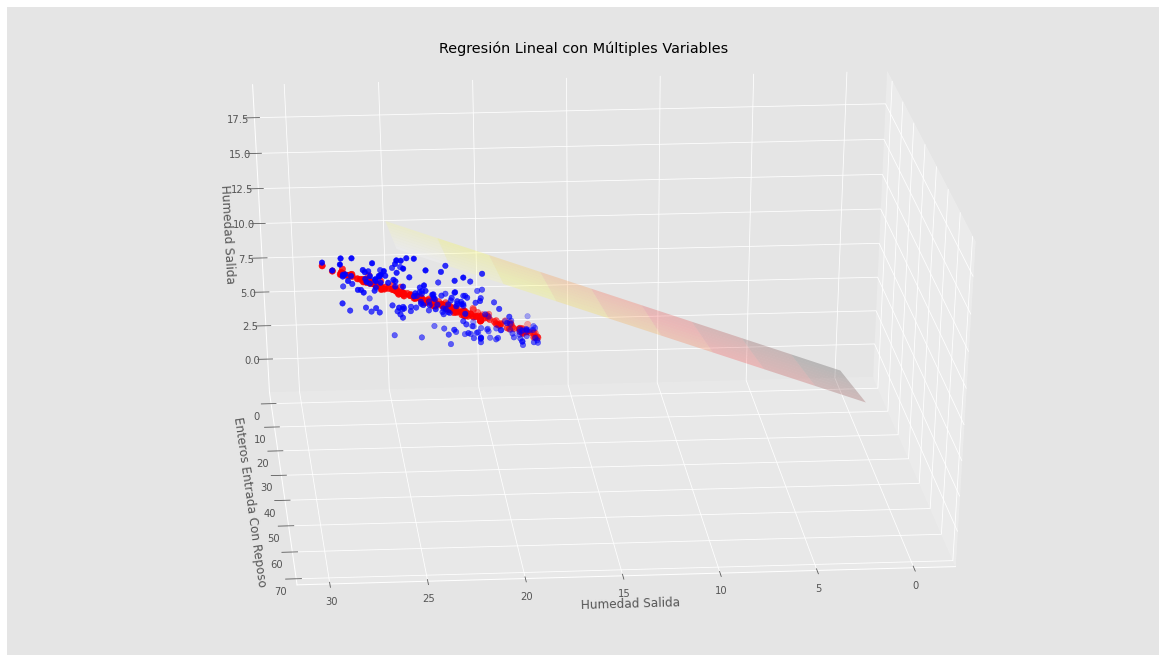

In [63]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 25, num=10), np.linspace(0, 25, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=85)
        
ax.set_xlabel('Humedad Salida')
ax.set_ylabel('Enteros Entrada Con Reposo')
ax.set_zlabel('Humedad Salida')
ax.set_title('Regresión Lineal con Múltiples Variables')

Se puede rotar el gráfico para apreciar el plano desde diversos ángulos modificando el valor del parámetro azim en view_init con números de 0 a 360.

#**Predicción con el modelo de Mútiples Variables**
Vemos ahora, que predicción se tendrá para una Humedad Ingreso de 24 y un valor de Enteros Ealida Con Reposo de 63.

In [64]:
# Según nuestro modelo, se realiza:
 
z_veinticuatro = regr2.predict([[24, 63]])
print(z_veinticuatro)

[15.15968868]


Para este caso nuevamente predice un valor de 15 como Humedad Salida con una diferencia muy chica en los decimales. Este resultado en parte se debe a que el rango de valores de la Humedad salida es chico, por lo cual para obtener mejores resultados es probable que haya que incluir más variables.